# ORIE 4580/5580/5581 Assignment 2

#### Students: Blake Green (bkg43), Andrea Rodriguez (ajr288)

### Instructions


* Due Thursday September 11, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 4 and 6 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell. You can skip things that seem more advanced, like the Beta distribution in $Ch\, 4$ and the part on queueing in $Ch\,6$ - the part about paradoxes in probability is also strictly speaking not required$\ldots$(but I would never recommend *not* reading that!)

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


---

---

## Question 1: Practice with expectation and variance (25 pts)



---


**(a)** Given a coin which comes up *Heads* with probability $p$, let $N_p$ denote the number of times the coin is tossed until the first *Heads*. Argue that $$N_p = \begin{cases} 1 & \text{with probability } p\\ 1+\tilde{N}_p & \text{with probability } 1-p \end{cases}$$
where $\tilde{N}_p$ is an independent random variable with the same distribution as $N_p$.
Using this, show that $\mathbb{E}[N_p] = 1/p$. Also use a similar argument to find $Var(N_p)$.

*Note: The rv $N_p$ is said to be a Geometric$(p)$ rv; it has pmf $p(k) = (1-p)^{k-1}p$.*



---



### Ans.
### Geometric RV via first-step analysis

Let $N_p$ be the number of tosses until the first Head when $\Pr(H)=p$.

#### Distributional decomposition
If the first toss is Head (with probability $p$), then $N_p = 1$.

If the first toss is Tail (with probability $1-p$), we have already used one toss and we are *back where we started* by independence and the memoryless property. The remaining number of tosses has the same distribution as $N_p$, independent of the first toss. Hence,
$$
N_p =
\begin{cases}
1 & \text{with probability } p, \\\\
1 + \tilde{N}_p & \text{with probability } 1-p,
\end{cases}
$$
where $\tilde{N}_p$ is an independent copy of $N_p$.



#### Expectation
Let $m = \mathbb{E}[N_p]$:
$$
m = p \cdot 1 + (1-p)(1+m) \;\;\Rightarrow\;\; pm=1 \;\;\Rightarrow\;\;
\mathbb{E}[N_p]=\frac{1}{p}.
$$

#### Variance
Let $s = \mathbb{E}[N_p^2]$:
$$
s = p \cdot 1^2 + (1-p)(1 + 2m + s),
$$
so
$$
ps = 1 + 2(1-p)m.
$$
With $m=\tfrac{1}{p}$:
$$
s = \frac{1}{p} + \frac{2(1-p)}{p^2}.
$$

Hence
$$
\mathrm{Var}(N_p) = s - m^2 = \frac{1-p}{p^2}.
$$



___

**(b)** In the previous assignment you estimated $\pi$ by sampling uniform random points $(X,Y)$ in $[-1,1]\times[-1,1]$, and checking if they fell within the circle. Suppose instead you sampled $n$ points uniformly in $[0,1]\times[0,1]$ and checked if $X^2+Y^2\leq 1$. Let $N_c$ be the number of points satisfying this; what is $\mathbb{E}[N_c]$ and $\text{Var}(N_c)$? Can you use this to get a better estimate of $\pi$ (i.e., with tighter confidence intervals given the same number of samples $n$)?

___

### Ans.
If we were to sample in the space $[0,1] \times [0,1]$, part of the circle that is within that region has area of

$$\frac{\pi}{4}.$$

In other words, we can model this with a Bernoulli$\left(\frac{\pi}{4}\right)$ where the probability of success is  

$$p = \frac{\pi}{4}.$$

Thus, the expected number of points within the circle would be  

$$\mathbb{E}[X] = n \cdot \frac{\pi}{4}.$$

The variance would be  

$$\mathrm{Var}(X) = np(1-p) = n \cdot \frac{\pi}{4} \left(1 - \frac{\pi}{4}\right).$$

Simplifying,  

$$\mathrm{Var}(X) = n \cdot \frac{3\pi}{16}.$$

The variance is the same as in the previous assignment. Therefore, we cannot use this setup to get a better estimate of $\pi$, since the variances are equal in both Bernoulli random variables.  

The tightness of our confidence interval depends on the sample size $n$ and the variance, which is the same in both cases.


---
**(c)** The elevators in Rhodes Hall stop at $6$ floors. Suppose one morning you get in on the ground floor with $3$ other people, and each one of you wants to go to a floor in $\{2,3,4,5,6\}$ chosen uniformly at random, and independently of the others' choices. At how many floors will the elevator stop on average?


---

# Elevator Stops Problem

We have 4 people and 5 possible destination floors \(\{2,3,4,5,6\}\).  
Total equally likely assignments:  

$$
5^4 = 625
$$

Let \(K\) be the number of distinct floors chosen (the number of stops).  


### Case \(k=1\): All 4 pick the same floor
- Choose 1 floor: \(\binom{5}{1}=5\).  
- All 4 must choose that floor: 1 way.  
- Total favorable: \(5\).  

$$
P(1) = \frac{5}{625} = \frac{1}{125}
$$


### Case \(k=2\): Exactly 2 distinct floors are chosen
- Choose 2 floors: \(\binom{5}{2}=10\).  
- Assign 4 people to 2 floors, both used: \(2^4 - 2 = 14\).  
- Total favorable: \(10* 14 = 140\).  

$$
P(2) = \frac{140}{625}
$$


### Case \(k=3\): Exactly 3 distinct floors are chosen
- Choose 3 floors: \(\binom{5}{3}=10\).  
- Assign 4 people to 3 floors, all used:  

$$
3^4 - 3\cdot 2^4 + 3\cdot 1^4 = 81 - 48 + 3 = 36
$$  

- Total favorable: \(10 \times 36 = 360\).  

$$
P(3) = \frac{360}{625}
$$


### Case \(k=4\): Exactly 4 distinct floors are chosen
- Choose 4 floors: \(\binom{5}{4}=5\).  
- Assign 4 people to 4 floors, all used (bijection): \(4! = 24\).  
- Total favorable: \(5 \times 24 = 120\).  

$$
P(4) = \frac{120}{625}
$$


### Case \(k=5\): All 5 distinct floors are chosen
Impossible, since only 4 people are choosing.  

$$
P(5) = 0
$$


### Distribution Summary
$$
\begin{aligned}
P(1) &= \tfrac{5}{625} = \tfrac{1}{125}, \\
P(2) &= \tfrac{140}{625}, \\
P(3) &= \tfrac{360}{625}, \\
P(4) &= \tfrac{120}{625}, \\
P(5) &= 0
\end{aligned}
$$

Check: \(5 + 140 + 360 + 120 = 625 \ \checkmark\).


### Expected Value
$$
\mathbb{E}[K] = 1\cdot \tfrac{5}{625} + 2\cdot \tfrac{140}{625} + 3\cdot \tfrac{360}{625} + 4\cdot \tfrac{120}{625}
$$

$$
= \frac{5 + 280 + 1080 + 480}{625}
= \frac{1845}{625}
= \frac{369}{125}
\approx 2.952
$$


**Final Answer:**  

$$
\mathbb{E}[K] = \frac{369}{125} \approx 2.952
$$


---

(d) For your next simulation homework, you pair up with a student you have not met before. At some point, you get bored of the homework, and decide to count how many common friends you have at Cornell. Suppose the total number of students at Cornell is $22,000$, out of which you have $500$ friends, and your homework partner has $440$. Assuming that for both of you, your friends form independent and uniform random samplings of the total student population, what is the expected number of friends you both have in common?

---

### Ans.
For any given student, the probability they are my friend is 500/22,000. The probability they are my partner’s friend is 440/22,000. The probability they are both my friend and my partner’s friend is (500/22,000) x (440/22,000). This is found by independence of each the random variables. We can thus find the expected number of friends we have in common by multiplying this probability by the 22,000 population of students. This gives E(friends in common) =  (500/22,000)x(440/22,000) x (22,000) = 10.

___
___

## Question 2: Pooled Testing (30 pts) ##


In 2020 Fall, Cornell adopted pooled testing to test a large population with a limited number of Covid tests. In pooled testing a sample is taken from each person and split into two subsamples. The first subsample from each person is pooled with those of $n-1$ other people into a single pooled sample of size $n$ people. (Cornell eventually used $n=5$.) If the pooled test comes back negative, then we declare all $n$ people in the pool to be
negative. If the pooled test comes back positive, we then individually test the second subsample from every person in the pool. In this question we'll explore the effects of different pool sizes $n$.

---

**(a)** The *prevalence* $p$ at the time of testing is defined to be the true fraction of people with Covid in the population. Now let $N$ be the number of (true) Covid-positive people in a pool of size $n$. What would you use as a model for the distribution of $N$, if you knew the $n$ people in the pool $(i)$ had never met each other in the last week, and $(ii)$ all lived in the same house. In each case, what is the mean and variance of $N$?

---

### Ans.
(i)If they had not met in the last week, we would model N by using a binomial distribution since each test is an independant bernoulli random variable with probability p, which is the prevalence defined above, with variance np(1-p).

(ii)If they all lived together, they would be highly correlated, then we would have:
# Variance of Correlated Bernoulli Random Variables

Suppose we have \(n\) Bernoulli random variables, each with success probability \(p\).  


For a single Bernoulli random variable:

$$
\mathrm{Var}(\text{Bernoulli}(p)) = p(1-p)
$$

If any two Bernoulli variables have correlation \(\rho\), then the covariance is:

$$
\mathrm{Cov}(X_i, X_j) = \rho \, p(1-p)
$$


Let

$$
N = \sum_{i=1}^n X_i
$$

be the total number of successes.


### Step 1: Variance decomposition

$$
\mathrm{Var}(N) = \sum_{i=1}^n \mathrm{Var}(X_i) \;+\; 2 \sum_{1 \leq i < j \leq n} \mathrm{Cov}(X_i, X_j)
$$


### Step 2: Plug in values

Each \(X_i\) has variance \(p(1-p)\).  
Each pair \((i,j)\) has covariance \(\rho p(1-p)\).  

So:

$$
\mathrm{Var}(N) = n \, p(1-p) + 2 \cdot \binom{n}{2} \cdot \rho \, p(1-p)
$$


### Step 3: Simplify

Since

$$
\binom{n}{2} = \frac{n(n-1)}{2},
$$

we have:

$$
\mathrm{Var}(N) = n \, p(1-p) + \rho \, n(n-1) \, p(1-p)
$$

Factor:

$$
\mathrm{Var}(N) = n \, p(1-p) \big(1 + (n-1)\rho \big)
$$

---

### Final Expression

$$
\boxed{ \mathrm{Var}(N) = n \, p(1-p) \, \big(1 + (n-1)\rho \big) }
$$




___

**(b)** Suppose that the test has no *false positives* and no *false negatives*; it comes back positive if **anyone** in the pool is positive and comes back negative if all people in the pool are negative. Let $T$ be the number of tests you need to be *sure* of each persons status (i.e., if they are COVID positive or not). What is the distribution of $T$, and what is its mean and variance? Clearly state all assumptions you are making.

---

### Ans.
### (b) Distribution of the number of tests \(T\)


**Assumptions**
- Perfect test: no false positives or false negatives.  
- Pool size: $n$.  
- Each individual is infected independently with probability $p$.  
- Let $N \sim \mathrm{Binomial}(n,p)$ be the number of infected people in the pool.

**Case analysis**
- If $N=0$: pooled test is negative → only **1** test is performed.  
- If $N \ge 1$: pooled test is positive → need **1 pooled test + $n$ individual tests = $1+n$**.

So,
$$
T = \begin{cases}
1, & \text{with probability } (1-p)^n, \\
1+n, & \text{with probability } 1-(1-p)^n.
\end{cases}
$$



**Mean**
$$
\mathbb{E}[T] = 1 \cdot (1-p)^n + (1+n)\bigl[1-(1-p)^n\bigr]
= 1 + n\left[1-(1-p)^n\right].
$$

**Variance**
Since $T = 1 + n \cdot \mathbf{1}\{N \ge 1\}$,
$$
\mathrm{Var}(T) = n^2 \,\Bigl[1-(1-p)^n\Bigr](1-p)^n.
$$









___

**(c)** What is the pool size $n$ that minimizes the average number of tests per person when the prevalence is $0.0001$? What about when prevalence is $0.01$? You should do this numerically using plots (i.e., without calculus), as this is helps explain your recommendation to decision-makers (note though that you may want to test different ranges of $n$ for each setting).

---

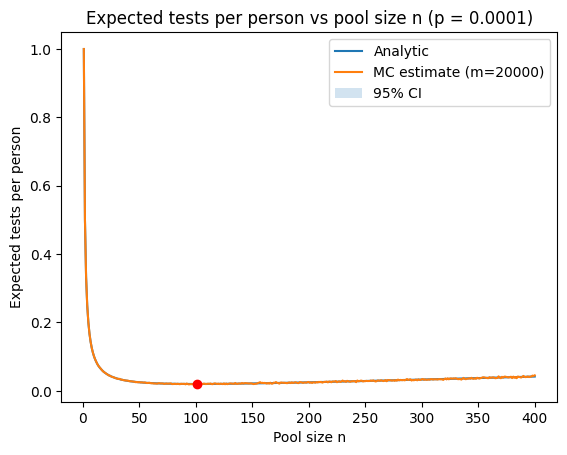

p = 0.0001: optimal n (analytic) = 101, analytic E[T]/n = 0.019951
          MC at n* = 0.020051 ± 0.001389 (95% CI)


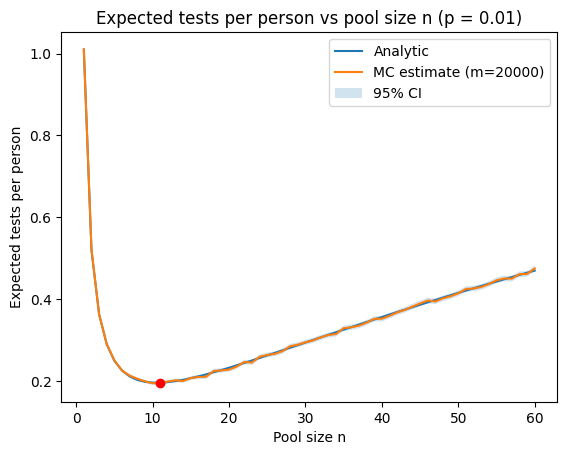

p = 0.01: optimal n (analytic) = 11, analytic E[T]/n = 0.195571
          MC at n* = 0.194359 ± 0.004221 (95% CI)


In [ ]:
# Numerical search for optimal pool size n (Dorfman pooling)
# Expected tests per person: E[T]/n = 1/n + (1 - (1-p)**n)

import numpy as np
import matplotlib.pyplot as plt

def tests_per_person(n, p):
    n = np.asarray(n, dtype=float)
    return 1.0/n + (1.0 - (1.0 - p)**n)

def find_optimal_n(p, n_max):
    n_vals = np.arange(1, n_max+1)
    y = tests_per_person(n_vals, p)
    idx = int(np.argmin(y))
    return n_vals, y, int(n_vals[idx]), float(y[idx])

def simulate_ci(p, n_vals, m=20000, seed=123):
    """
    Monte Carlo estimate of E[T]/n and 95% CI half-width for each n.
    """
    rng = np.random.default_rng(seed)
    means = []
    ci_half = []
    for n in n_vals:

        q = 1 - (1 - p)**n
        draws = rng.binomial(1, q, size=m)
        p_hat = draws.mean()
        mean_hat = 1/n + p_hat
        se = np.sqrt(p_hat*(1 - p_hat)/m)
        ci = 1.96 * se
        means.append(mean_hat)
        ci_half.append(ci)
    return np.array(means), np.array(ci_half)


m = 20000
seed = 123

# Case 1: p = 0.0001
p1 = 1e-4
n_vals1, y1, n_star1, y_star1 = find_optimal_n(p1, n_max=400)
y1_sim, ci1 = simulate_ci(p1, n_vals1, m=m, seed=seed)

plt.figure()
plt.plot(n_vals1, y1, label="Analytic")
plt.plot(n_vals1, y1_sim, label=f"MC estimate (m={m})")
plt.fill_between(n_vals1, y1_sim - ci1, y1_sim + ci1, alpha=0.2, label="95% CI")
plt.scatter([n_star1], [y_star1], color="red", zorder=5)
plt.title(f"Expected tests per person vs pool size n (p = {p1})")
plt.xlabel("Pool size n")
plt.ylabel("Expected tests per person")
plt.legend()
plt.show()

i1 = np.where(n_vals1 == n_star1)[0][0]
print(f"p = {p1}: optimal n (analytic) = {n_star1}, analytic E[T]/n = {y_star1:.6f}")
print(f"          MC at n* = {y1_sim[i1]:.6f} ± {ci1[i1]:.6f} (95% CI)")

# Case 2: p = 0.01
p2 = 1e-2
n_vals2, y2, n_star2, y_star2 = find_optimal_n(p2, n_max=60)
y2_sim, ci2 = simulate_ci(p2, n_vals2, m=m, seed=seed)

plt.figure()
plt.plot(n_vals2, y2, label="Analytic")
plt.plot(n_vals2, y2_sim, label=f"MC estimate (m={m})")
plt.fill_between(n_vals2, y2_sim - ci2, y2_sim + ci2, alpha=0.2, label="95% CI")
plt.scatter([n_star2], [y_star2], color="red", zorder=5)
plt.title(f"Expected tests per person vs pool size n (p = {p2})")
plt.xlabel("Pool size n")
plt.ylabel("Expected tests per person")
plt.legend()
plt.show()

i2 = np.where(n_vals2 == n_star2)[0][0]
print(f"p = {p2}: optimal n (analytic) = {n_star2}, analytic E[T]/n = {y_star2:.6f}")
print(f"          MC at n* = {y2_sim[i2]:.6f} ± {ci2[i2]:.6f} (95% CI)")




### Ans.
For prevalence 0.0001 the pool size that minimizes the number of tests needed is
101, and for prevalence 0.01 the pool size that minimizes the numer of tests needed is 11.

First, we created a function called tests_per_person(n, p) that implements the formula for expected tests per person: 1/n + (1 - (1-p)^n). Next, we wrote a function find_optimal_n(p, n_max) that calculates this value for every possible pool size from 1 up to n_max and returns the pool size with the minimum value. Finally, we used these functions to analyze two specific cases: a low prevalence rate (p=0.0001) with a max pool size of 400, and a higher rate (p=0.01) with a max pool size of 60. For each case, we generated a plot of the results, highlighted the optimal point on the graph, and printed the optimal pool size and its corresponding efficiency.




---

*(d)* A more critical characteristic of pooled tests is the false negative rate, which is the probability that a test comes back negative when at least one person in the pool is Covid positive. False negatives are dangerous, because the person (or people) with Covid in the pool can infect others until Covid is otherwise detected or they become no longer infectious.

You know that false negatives must be more likely when there is a low viral load in a sample. To understand how to model false negatives in PCR tests, you consult with your friend who is a biologist, who tells you that the viral load $V$ in a PCR sample is measured using something called the cycle threshold (CT) score of a PCR test, which is equivalent to $C = -\log_2 V$. The viral load for a Covid-negative person is $V=0$. In a pooled sample of size $n$, each person contributes a fraction $1/n$ of the sample, and the resulting viral load has a total CT score of:
$$-\log_2 \left(\frac 1 n \sum_{i=1}^n 2^{-C_i}\right),$$
where $C_1, C_2, \ldots, C_n$ are the CT scores of each person in the pool. Finally, your friend recalls that probability $\mathbb{P}[\text{false positive test}|C]$ of a false negative in a single PCR test is well modeled either as
$\frac{1}{1 + \exp(-10(C - 35))}$ or $\frac{1}{1 + \exp(10(C - 35))}$ (but he can not remember which one 🙁).

Can you figure out what the correct model is?

---



### Ans.
The correct model is 1/(1+exp(-10(C-35))). We know this because as C increases, the overall function increases. This makes sense as when C increases the probability of seeing a false negative test should increase because higher C means a lower viral load V.



---


*(e)* You consult the epidemiology literature and find that the viral load for a Covid-positive person has been found from data to have a CT score $C$ that is well modeled via a *mixture of Gaussian* distribution as follows: with probability $0.40$, $C$ is $\mathcal{N}(20, 3.5^2)$ (i.e., normally distributed with mean 20 and variance $3.5^2$); with probability $0.5$, $C$ is $\mathcal{N}(30, 3^2)$, and otherwise,  $C$ is $\mathcal{N}(34.78, 1.32^2)$.

Use this data with the above model to estimate the probability of a false negative in a pooled test of size $n$ containing a single Covid-positive person as a function of $n$. You'll need to generate, say, $m$ replications of the pooled test at each value of $n$, where you should choose $m$ to ensure that your results are meaningful. Report your results as a graph with the false negative rate on the $y$-axis and the pool size $n$ ranging from 1 to 50 on the $x$-axis. Select your simulation runlength so that your estimates would be useful in practice (for example, estimates that are $\pm$ 0.02 or so are sufficiently accurate).


---


### Ans.

Exactly one COVID-positive in the pool of size n; others are negative (V=0).
 - Pool CT with one positive: C_pool = C_individual + log2(n)  (since V_pool = V/ n).
 - False negative probability given CT C_pool:
       p_fn(C) = 1 / (1 + exp(-10*(C - 35)))
 - Positive individual CT distribution is a Gaussian mixture:

 Notes on CIs:
 - For each n, we run m Bernoulli trials with success prob p_fn(C_pool) (Monte Carlo).
 - Let p_hat be the sample mean; then a 95% CI via normal approx is:
       p_hat ± 1.96 * sqrt(p_hat*(1 - p_hat) / m)
 - With m=10000, the worst-case 95% half-width is about 0.0098 (< 0.02 target).       0.40 * N(20, 3.5^2) + 0.50 * N(30, 3^2) + 0.10 * N(34.78, 1.3^2)

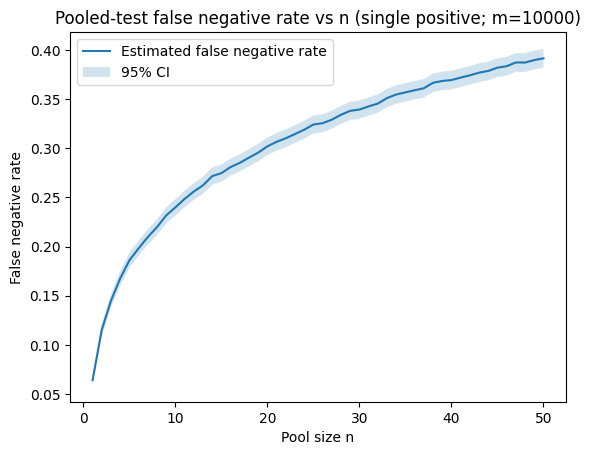

n	FN rate		95% CI
1	0.0641		[0.0593, 0.0689]
2	0.1154		[0.1091, 0.1217]
5	0.1860		[0.1784, 0.1936]
10	0.2399		[0.2315, 0.2483]
20	0.3020		[0.2930, 0.3110]
30	0.3394		[0.3301, 0.3487]
40	0.3694		[0.3599, 0.3789]
50	0.3915		[0.3819, 0.4011]


In [ ]:
# Simulation for part (e): False negative rate vs pool size n = [1, 50]

import numpy as np
import matplotlib.pyplot as plt

n_min, n_max = 1, 50
m = 10_000
seed = 123

weights = np.array([0.40, 0.50, 0.10])
means   = np.array([20.0, 30.0, 34.78])
sds     = np.array([3.5,  3.0,  1.3 ])

rng = np.random.default_rng(seed)

def sample_positive_CT(num, rng):
    comps = rng.choice(len(weights), size=num, p=weights)
    return rng.normal(loc=means[comps], scale=sds[comps])

def p_false_negative_given_C(C):
    return 1.0 / (1.0 + np.exp(-10.0 * (C - 35.0)))


C_pos = sample_positive_CT(m, rng)

ns = np.arange(n_min, n_max + 1)
fn_rate = np.zeros_like(ns, dtype=float)
ci_half = np.zeros_like(ns, dtype=float)

for i, n in enumerate(ns):
    C_pool = C_pos + np.log2(n)
    p_fn   = p_false_negative_given_C(C_pool)


    draws = rng.binomial(1, p_fn, size=m).astype(float)
    p_hat = draws.mean()
    fn_rate[i] = p_hat


    se = np.sqrt(p_hat * (1.0 - p_hat) / m)
    ci_half[i] = 1.96 * se


plt.figure()
plt.plot(ns, fn_rate, label="Estimated false negative rate")
lower = np.maximum(0.0, fn_rate - ci_half)
upper = np.minimum(1.0, fn_rate + ci_half)
plt.fill_between(ns, lower, upper, alpha=0.2, label="95% CI")
plt.xlabel("Pool size n")
plt.ylabel("False negative rate")
plt.title(f"Pooled-test false negative rate vs n (single positive; m={m})")
plt.legend()
plt.show()

selected = [1, 2, 5, 10, 20, 30, 40, 50]
print("n\tFN rate\t\t95% CI")
for n in selected:
    i = n - n_min
    lo, hi = max(0.0, fn_rate[i] - ci_half[i]), min(1.0, fn_rate[i] + ci_half[i])
    print(f"{n}\t{fn_rate[i]:.4f}\t\t[{lo:.4f}, {hi:.4f}]")


ChatGPT assisted us with creating the code for this problem.

We needed to simulate how pool size affects false negative rates. We created a function to generate viral loads from a mixture of normal distributions and another to calculate false negative probability based on viral load concentration. The main simulation tested pool sizes from 1 to 50. For each size n, we adjustde the viral load by adding log2(n), calculated the false negative probability, and ran 10,000 simulations to estimate the actual false negative rate and 95% confidence interval. Finally, we ploted the results showing false negative rate vs. pool size with confidence bands, and printed a table of key values to demonstrate how error rates increase with larger pools.

## Question 3: Buffon and his magic needle (20 points)

In the first class we saw Buffon's needle experiment in which we drop needles of length 1 on a floor of parallel lines that are equally spaced 1 unit apart. If we drop $n$ needles and $N_{cross}$ of them cross a line, then an estimate of $\pi$ is $\hat{\pi}_n = 2n/N_{cross}$. We will now study how this works in practice (feel free to use the code provided in class).


---

**(a)** For a range of values of $n$ between $10$ and $10,000$, perform $30$ replications of the Buffon needle experiment. For each value of $n$ you test, plot the average of the $30$ estimates $\hat{\pi}_n = 2n/N_{cross}$ and a 95\% confidence interval for the expected value of $\hat{\pi}_n$. You should only be making one plot, with $n$ on the $x$-axis, and estimates and CIs on the $y$-axis.



---



### Ans.

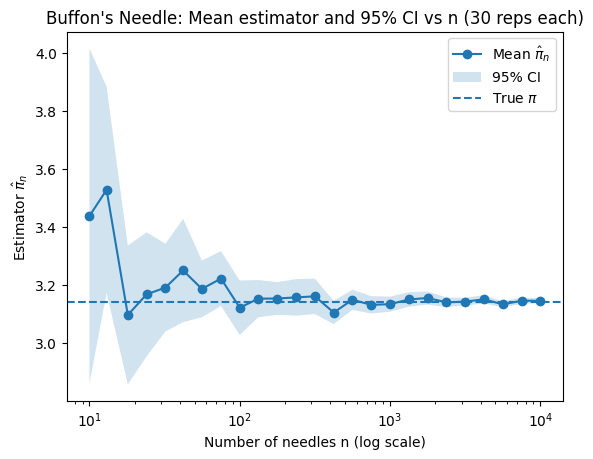

Sample results:
n=   10: mean=3.43783, 95% CI=[2.86030, 4.01536]
n=  100: mean=3.12200, 95% CI=[3.02830, 3.21570]
n= 1000: mean=3.13415, 95% CI=[3.10815, 3.16014]
n=10000: mean=3.14587, 95% CI=[3.13787, 3.15386]


In [ ]:
# Buffon's Needle: mean π-hat and 95% CI vs n (single plot)
# Needle length = 1, line spacing = 1

import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.stats import t

rng = np.random.default_rng(42)

def buffon_crosses(n, rng):

    theta = rng.uniform(0.0, np.pi/2, size=n)
    u = rng.uniform(0.0, 0.5, size=n)
    crosses = (u <= 0.5 * np.sin(theta)).sum()
    return int(crosses)

def run_replications(n, R=30, rng=None):

    hats = []
    for _ in range(R):
        Nc = buffon_crosses(n, rng)

        if Nc == 0:
            while Nc == 0:
                Nc = buffon_crosses(n, rng)
        hats.append(2.0 * n / Nc)
    return np.array(hats, dtype=float)

n_values = np.unique(np.round(np.logspace(1, 4, num=25)).astype(int))

R = 30
alpha = 0.05
df = R - 1
tcrit = t.ppf(1 - alpha/2, df)

means = []
halfwidths = []

for n in n_values:
    hats = run_replications(n, R=R, rng=rng)
    m = hats.mean()
    s = hats.std(ddof=1)
    se = s / np.sqrt(R)
    hw = tcrit * se
    means.append(m)
    halfwidths.append(hw)

means = np.array(means)
halfwidths = np.array(halfwidths)

plt.figure()
plt.plot(n_values, means, marker='o', linestyle='-', label=r"Mean $\hat{\pi}_n$")
plt.fill_between(n_values, means - halfwidths, means + halfwidths, alpha=0.2, label="95% CI")
plt.axhline(pi, linestyle='--', label=r"True $\pi$")
plt.xscale('log')
plt.xlabel("Number of needles n (log scale)")
plt.ylabel(r"Estimator $\hat{\pi}_n$")
plt.title("Buffon's Needle: Mean estimator and 95% CI vs n (30 reps each)")
plt.legend()
plt.show()

print("Sample results:")
for n in [10, 30, 100, 300, 1000, 3000, 10000]:
    if n in n_values:
        i = np.where(n_values == n)[0][0]
        lo, hi = means[i] - halfwidths[i], means[i] + halfwidths[i]
        print(f"n={n:5d}: mean={means[i]:.5f}, 95% CI=[{lo:.5f}, {hi:.5f}]")


Code from lecture was put into ChaGPT to help make this


---

**(b)** You may notice from your plot in part (a) that the estimator $\hat{\pi}_n$ has some *bias*, i.e., $\mathbb{E}[\hat{\pi}_n] \neq \pi$ (this may be more apparent for small values of $n$). Pick a small value (say, $n=100$), and do more replications (i.e., do multiple experiments, where in each experiment you throw $100$ needles), and determine if $\hat{\pi}_n$ is an overestimate or underestimate for $\pi$.


---


### Ans.
We can see that the resulting confidence interval does not contain pi and its values are larger than pi therefore pi sub(n) is an overestimate for pi

In [ ]:
# Buffon's Needle bias check at n=100 with confidence interval and conclusion
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.stats import t

rng = np.random.default_rng(2025)

def buffon_crosses(n, rng):

    theta = rng.uniform(0.0, np.pi/2, size=n)
    u = rng.uniform(0.0, 0.5, size=n)
    crosses = (u <= 0.5 * np.sin(theta)).sum()
    return int(crosses)

def run_replications(n=100, R=5000, rng=None):

    hats = np.empty(R, dtype=float)
    for r in range(R):
        Nc = buffon_crosses(n, rng)

        while Nc == 0:
            Nc = buffon_crosses(n, rng)
        hats[r] = 2.0 * n / Nc
    return hats


n = 100
R = 5000


hats = run_replications(n=n, R=R, rng=rng)

alpha = 0.05
df = R - 1
tcrit = t.ppf(1 - alpha/2, df)

mean_hat = hats.mean()
sd_hat = hats.std(ddof=1)
se_hat = sd_hat / np.sqrt(R)
ci_low = mean_hat - tcrit * se_hat
ci_high = mean_hat + tcrit * se_hat

bias = mean_hat - pi

print(f"Buffon's Needle Bias Check at n={n} with R={R} experiments")
print(f"Mean estimator E_hat[π̂_n] ≈ {mean_hat:.6f}")
print(f"95% CI for E[π̂_n]: [{ci_low:.6f}, {ci_high:.6f}]")
print(f"True π = {pi:.6f}")
print(f"Estimated bias (mean - π) = {bias:.6f}")


Buffon's Needle Bias Check at n=100 with R=5000 experiments
Mean estimator E_hat[π̂_n] ≈ 3.150229
95% CI for E[π̂_n]: [3.143682, 3.156776]
True π = 3.141593
Estimated bias (mean - π) = 0.008636


Code from lecture was put into ChaGPT to help make this

**(c)** Can you mathematically justify your observation from part (b)?

### Ans.
We use the estimator
$$
\hat{\pi}_n \;=\; \frac{2n}{N_{\text{cross}}} \;=\; \frac{2}{\hat p},
\qquad \hat p \;=\; \frac{N_{\text{cross}}}{n},
$$
where $N_{\text{cross}} \sim \mathrm{Binomial}(n,p)$ and $p=\Pr(\text{cross})=2/\pi$.


Direction of the bias (Jensen’s inequality).**  
Let $g(x)=2/x$. Then $g''(x)=4/x^3>0$, so $g$ is convex on $(0,1]$. Since $\mathbb{E}[\hat p]=p$,
$$
\mathbb{E}[\hat{\pi}_n]
\;=\; \mathbb{E}\!\big[g(\hat p)\big]
\;\ge\; g\!\big(\mathbb{E}[\hat p]\big)
\;=\; \frac{2}{p}
\;=\; \pi.
$$
Thus $\hat{\pi}_n$ is **upward biased** (it overestimates $\pi$ on average).

**(d)** Note however that you can still use Buffon's experiment to get an estimate with $95$\% confidence intervals for $\mathbb{E}[\frac{N_{\text{cross}}}{n}]$. Using this, can you get a $95$\% confidence interval for $\pi$? (Note: this need not be symmetric about $\pi$).

### Ans.
If a 95% confidence interval for the crossing probability is $[p_L,\, p_U]$, then the 95% CI for the expected number of crossings is
$[\,n p_L,\, n p_U\,]$ since $\mathbb{E}[N_{\text{cross}}^{(n)}]=n p$.

Because $\pi = \dfrac{2}{p}$ is decreasing in $p$, the induced 95% CI for $\pi$ is
$$
\left[\, \frac{2}{p_U},\ \frac{2}{p_L} \,\right].
$$
(Endpoints flip under the decreasing transformation.)


**(e) (Optional for everyone!)** Try to convince yourself (by linearity of expectation), that

(i) If you randomly throw $n$ matches of length $\ell$ and let $N^{\ell}_{\text{cross}}$ be a count of how many times these cross the lines, then $\frac{\mathbb{E}[N^{\ell}_{\text{cross}}]}{\ell} = $ constant (in other words, the expected number of crossings is proportional to $\ell$). Note: if $\ell>1$, each match may cross multiple lines.

(ii) The above result remains true if you throw *any* line segment (with any shape) of length $\ell$. Using this, can you see an easy way to compute $\mathbb{E}[N^{1}_{\text{cross}}]$ (i.e., the probability of a match crossing a line in the original experiment)?

## Question 4: Overbooking (25 points)

A website called Tixmaster is in charge of selling tickets for an upcoming Taylor Swift concert in Ithaca. The concert will take place in the State Theater, which has an official capacity of $1500$ seats. You believe however that Tixmaster has sold $1600$ tickets (representatives of the company, when contacted, denied this$\ldots$).

The show starts at 7pm, and if a ticket holder hasn't shown up by that time, then they are not allowed to enter anymore so as to not disturb the other attendees. From experience, you believe that there is a 95\% chance that someone who has bought a ticket actually shows up by 7pm. and that people show up (or not) independently from one another.



---

**(a)** You wait inside the State Theater and count the number of people entering. What is the probability that you will be able to prove that Tixmaster is overbooking? (You can do this with or without simulation)


---

### Ans.

We model the number of attendees by a binomial random variable:

$$
X \sim \text{Binomial}(n=1600, p=0.95).
$$

We want:

$$
P(X > 1500).
$$



Since \(n\) is large,

$$
\mu = np = 1600 \cdot 0.95 = 1520, \quad
\sigma^2 = np(1-p) = 1600 \cdot 0.95 \cdot 0.05 = 76,
$$

so

$$
\sigma = \sqrt{76} \approx 8.7178.
$$

Approximate:

$$
X \approx Y \sim N(1520, 76).
$$


$$
P(X > 1500) \approx P(Y > 1500.5).
$$

Standardize:

$$
Z = \frac{1500.5 - 1520}{8.7178} \approx -2.237.
$$



$$
P(Y > 1500.5) = P(Z > -2.237) = 1 - P(Z < -2.237).
$$

From standard normal tables:

$$
P(Z < -2.237) \approx 0.0126,
$$

so

$$
P(Z > -2.237) = 1 - 0.0126 = 0.9874.
$$


$$
P(X > 1500) \approx 0.9874
$$

There is about a **98.74% probability** that more than 1500 people show up, i.e. strong evidence that Tixmaster is overbooking.


**(b)** You manage to catch Tixmaster overbooking this time, and to prevent it in future, you decide to impose a fine to try and disincentivize overbooking. You know Tixmaster earns 100 in profit for every ticket sold (whether the holder shows up or not). You again have an agent counting how many people show up to the concert by $7$pm (you can not see how many are late or no-shows), and can charge Tixmaster a fine of 500 for each person exceeding the capacity.

Use a simulation to estimate how many extra tickets (over 1600) Tixmaster will sell, if they are trying to maximize their expected profit (after paying any fines).

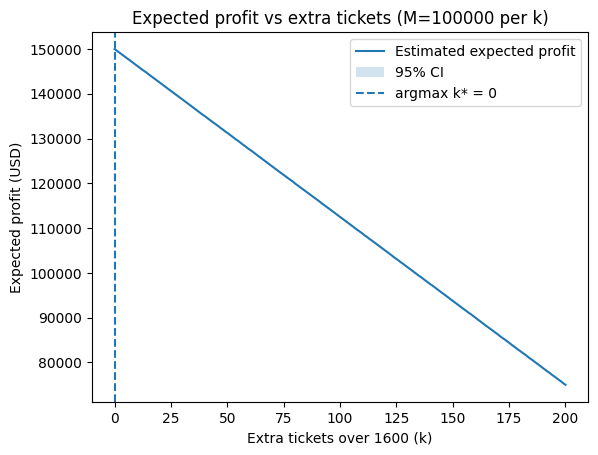

Optimal extra tickets k* = 0
Expected profit at k*: $149,981.85  (95% CI: $149,955.31 to $150,008.39)


In [ ]:
# - Capacity = 1500
# - Base tickets already sold = 1600
# - Show-up probability by 7pm = 0.95 (independent)
# - Profit per ticket (sold) = $100
# - Fine per person above capacity (observed by 7pm) = $500

import numpy as np
import matplotlib.pyplot as plt

cap = 1500
base = 1600
p_show = 0.95
profit_per_ticket = 100.0
fine_per_over = 500.0

K_MAX = 200
M = 100_000
seed = 7
rng = np.random.default_rng(seed)

ks = np.arange(0, K_MAX + 1)
exp_profit = np.empty_like(ks, dtype=float)
hw95 = np.empty_like(ks, dtype=float)

for i, k in enumerate(ks):
    n_sold = base + k
    X = rng.binomial(n_sold, p_show, size=M)
    overflow = np.maximum(X - cap, 0)
    profit = profit_per_ticket * n_sold - fine_per_over * overflow
    m = profit.mean()
    s = profit.std(ddof=1)
    se = s / np.sqrt(M)
    exp_profit[i] = m
    hw95[i] = 1.96 * se

idx_star = int(np.argmax(exp_profit))
k_star = int(ks[idx_star])
m_star = float(exp_profit[idx_star])
ci_lo_star = m_star - float(hw95[idx_star])
ci_hi_star = m_star + float(hw95[idx_star])

plt.figure()
plt.plot(ks, exp_profit, label="Estimated expected profit")
plt.fill_between(ks, exp_profit - hw95, exp_profit + hw95, alpha=0.2, label="95% CI")
plt.axvline(k_star, linestyle="--", label=f"argmax k* = {k_star}")
plt.xlabel("Extra tickets over 1600 (k)")
plt.ylabel("Expected profit (USD)")
plt.title(f"Expected profit vs extra tickets (M={M} per k)")
plt.legend()
plt.show()

print(f"Optimal extra tickets k* = {k_star}")
print(f"Expected profit at k*: ${m_star:,.2f}  (95% CI: ${ci_lo_star:,.2f} to ${ci_hi_star:,.2f})")

### Ans.
Tixmaster should not sell any additional tickets beyond 1600.



---



**(c) (For 5580/5581 students; optional for 4580)** Finally, you decide to stamp down on any overbooking by setting a large enough penalty so that Tixmaster does not find it profitable to sell even one extra ticket. Use simulation to find a fee $F$ charged per person over $1600$ admitted to the theater, such that it stops overbooking for each person who book after the number tickets sold exceed the capacity. (Ideally, try to propose as small an $F$ as possible, so that the city government feels it is practical to implement).

*(Note: This sort of a problem where you want to optimize a parameter via simulation is difficult. We will see some ways to do this more efficiently later in class; however, for this problem, it is easy to do a search over potential values of $F$ to find the first time that overbooking by even $1$ ticket becomes unprofitable.)*


---



### Ans.